In [1]:
import torch
import whitening as wh

In [2]:
n = 512
v = 100
k = 2
d = 5

In [3]:
#generate a random symmetric positive definite matrix
A = torch.randn(v, k, d, d)
Corr = torch.einsum('vkde,vkfe->vkdf', A, A) + 1

#generate random points correlated with Corr
X = torch.randn(n, v, k, d)
X = X - X.mean(0)

In [4]:
U, S, V = torch.svd(Corr)
S = torch.diag_embed(torch.sqrt(S))
W = torch.einsum('vkde,vkef->vkdf', U, S)
W = torch.einsum('vkdf,vkgf->vkdg', W, U)
Y = torch.einsum('nvkd,vkdg->nvkg', X, W)

Y += X.mean(0)

In [5]:
Z = wh.whitening(Y[:, 0, 0])

In [6]:
for method in ['zca', 'zca_cor', 'pca', 'pca_cor', 'cholesky']:
    whitening = wh.WhitenNorm(method=method)
    Z = whitening(Y)
    cov = torch.einsum("nvkd, nvkD -> vkdD", Z, Z) / (n - 1)
    cov = cov.view(-1, d, d)
    print(method, 'max abs difference from I:', torch.max(torch.abs(cov - torch.eye(5))))

zca max abs difference from I: tensor(0.0002)
zca_cor max abs difference from I: tensor(3.8862e-05)
pca max abs difference from I: tensor(0.0003)
pca_cor max abs difference from I: tensor(0.0001)
cholesky max abs difference from I: tensor(0.0003)


c:\Users\ConnardMcGregoire\Documents\Cadenza\elk\elk\training\whitening.py:30: UserWarning: Cholesky whitening does not output a symmetric matrix. If you want to train a probe                   on the normalised space, you should not use this method as it is not mathematically guaranteed                   to have the same probe decisions in original and normalised space.
  warn("Cholesky whitening does not output a symmetric matrix. If you want to train a probe\


In [7]:
random_tensor = torch.randn(1000,100,2,64)

In [8]:
v1 = random_tensor - random_tensor.mean(0)

v2 = random_tensor.view(1000, 100*2, 64)
v2 = v2 - v2.mean(0)

print(torch.max(torch.abs(v1 - v2.view(1000, 100, 2, 64))))

tensor(0.)


In [9]:
covs = torch.einsum('nvd, nvD -> vdD', v2, v2)

In [10]:
U, S, V = torch.svd(covs)

In [11]:
print(U.shape, S.shape, V.shape)

Ss = 1 / torch.sqrt(S)
# Ss is 200 x 64, and we need to transform it to a batch of diagonal matrices of size 200 x 64 x 64
print(Ss.shape)
print(Ss[0])

Ss = torch.diag_embed(Ss)
print(Ss.shape)
print(Ss[0])


torch.Size([200, 64, 64]) torch.Size([200, 64]) torch.Size([200, 64, 64])
torch.Size([200, 64])
tensor([0.0253, 0.0257, 0.0260, 0.0265, 0.0265, 0.0267, 0.0269, 0.0270, 0.0272,
        0.0275, 0.0277, 0.0277, 0.0281, 0.0283, 0.0285, 0.0288, 0.0290, 0.0291,
        0.0293, 0.0294, 0.0298, 0.0299, 0.0301, 0.0302, 0.0307, 0.0307, 0.0308,
        0.0309, 0.0311, 0.0313, 0.0315, 0.0316, 0.0317, 0.0318, 0.0321, 0.0322,
        0.0324, 0.0325, 0.0332, 0.0332, 0.0334, 0.0336, 0.0337, 0.0339, 0.0342,
        0.0345, 0.0347, 0.0353, 0.0355, 0.0356, 0.0359, 0.0360, 0.0364, 0.0366,
        0.0369, 0.0374, 0.0381, 0.0384, 0.0386, 0.0392, 0.0394, 0.0398, 0.0413,
        0.0423])
torch.Size([200, 64, 64])
tensor([[0.0253, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
        [0.0000, 0.0257, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
        [0.0000, 0.0000, 0.0260,  ..., 0.0000, 0.0000, 0.0000],
        ...,
        [0.0000, 0.0000, 0.0000,  ..., 0.0398, 0.0000, 0.0000],
        [0.0000, 0.0000, 0.0000,

In [12]:
x_normalized = torch.randn(1000, 200, 64)

torch.std(x_normalized, dim=0).shape

torch.Size([200, 64])

In [13]:
from matplotlib import pyplot as plt

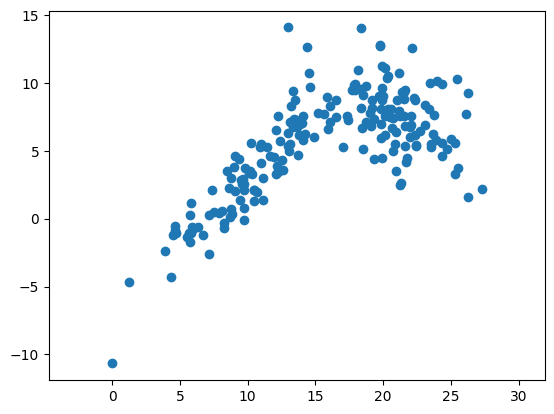

In [26]:
data = torch.randn(100, 2) * torch.tensor([5, 1]) + torch.tensor([10, 5])
data = torch.cat([data, torch.randn(100, 2) * torch.tensor([2, 3]) + torch.tensor([20, 10])])
data = data @ torch.tensor([[1/1.414, 1/1.414], [1/1.414, -1/1.414]])
plt.scatter(data[:, 0], data[:, 1])
plt.axis('equal')
plt.show()

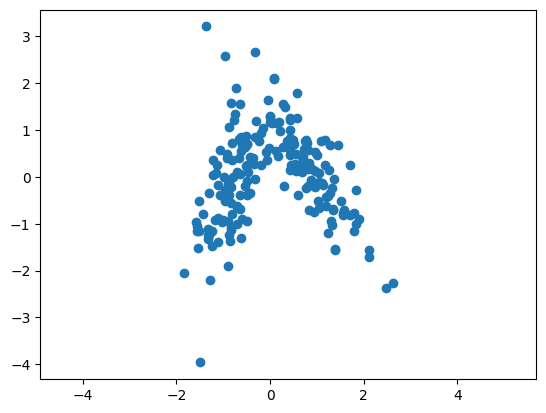

In [27]:
whitened_data = wh.whitening(data)
plt.scatter(whitened_data[:, 0], whitened_data[:, 1])
plt.axis('equal')
plt.show()